<a href="https://colab.research.google.com/github/ferpatugo/Estatistica-Python/blob/main/Aula_Exemplo_PROJETO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final Exemplo

# Carregando Pacotes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'colab'

# Configurações para exibir gráficos no notebook
init_notebook_mode(connected=True)

# Leitura do dataset

In [ ]:
def convert_num(x):
    try:
        return float(x.replace(',', '.').strip())
    except:
        return pd.NA

enade2017 = pd.read_csv(
    'MICRODADOS_ENADE_2017.txt',
    delimiter=';',
    encoding='latin1',
    converters={
        'NT_OBJ_CE': convert_num,
        'NT_GER': convert_num
    }
)


In [ ]:
enade2017

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
0,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185046,2017,20,5,10028,1601,66005,1,4314100,43,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185047,2017,20,5,10028,1601,66005,1,4314100,43,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185048,2017,20,5,10028,1601,66005,1,4314100,43,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185049,2017,20,5,10028,1602,66008,1,4314100,43,4,...,B,A,A,B,C,A,A,A,C,D


In [ ]:
# Seleção das variáveis desejadas
microdados_enade_filtrados = enade2017[['CO_GRUPO','CO_REGIAO_CURSO','NU_IDADE','TP_SEXO','CO_TURNO_GRADUACAO','NT_GER',
                                         'QE_I01','QE_I02','QE_I08','QE_I21','QE_I23','NT_OBJ_FG','NT_OBJ_CE']]



# Filtrando o curso de ADS

In [ ]:
microdados_ti = microdados_enade_filtrados[microdados_enade_filtrados['CO_GRUPO'] == 72].copy()

# Transformando variáveis - Colocando os labels

In [ ]:

estado_civil_map = {'A': 'Solteiro(a)', 'B': 'Casado(a)', 'C': 'Separado(a)', 'D': 'Viúvo(a)', 'E': 'Outro'}
microdados_ti['estado_civil2'] = microdados_ti['QE_I01'].map(estado_civil_map)

regiao_map = {1: 'Norte', 2: 'Nordeste', 3: 'Sudeste', 4: 'Sul', 5: 'Centro-Oeste'}
microdados_ti['regiao'] = microdados_ti['CO_REGIAO_CURSO'].map(regiao_map)

sexo_map = {'M': 'Masculino', 'F': 'Feminino'}
microdados_ti['sexo'] = microdados_ti['TP_SEXO'].map(sexo_map)

hestudos_map = {'A': 'Nenhuma, apenas assisto as aulas',
                'B': 'De uma a três',
                'C': 'De quatro a sete',
                'D': 'De oito a doze',
                'E': 'Mais de doze'}
microdados_ti['hestudos'] = microdados_ti['QE_I23'].map(hestudos_map)



# Data quality - Remover NA's

In [ ]:
microdados_ti_sem_NA = microdados_ti.dropna()

# Estatísticas resumo da variável NT_OBJ_CE

In [ ]:
microdados_ti_sem_NA['NT_OBJ_CE'] = pd.to_numeric(microdados_ti_sem_NA['NT_OBJ_CE'], errors='coerce')

moda_series = microdados_ti_sem_NA['NT_OBJ_CE'].mode()
moda_value = moda_series.iloc[0] if not moda_series.empty else None

estatisticas = {
    'quantidade': microdados_ti_sem_NA['NT_OBJ_CE'].count(),
    'media': microdados_ti_sem_NA['NT_OBJ_CE'].mean(),
    'mediana': microdados_ti_sem_NA['NT_OBJ_CE'].median(),
    'moda': moda_value,
    'cv': microdados_ti_sem_NA['NT_OBJ_CE'].std() / microdados_ti_sem_NA['NT_OBJ_CE'].mean() * 100,
    'assimetria': skew(microdados_ti_sem_NA['NT_OBJ_CE']),
    'curtose': kurtosis(microdados_ti_sem_NA['NT_OBJ_CE'])
}
print(estatisticas)

{'quantidade': np.int64(932), 'media': np.float64(43.03111587982833), 'mediana': 45.0, 'moda': np.float64(35.0), 'cv': np.float64(37.18833166821532), 'assimetria': np.float64(0.09656196776403853), 'curtose': np.float64(-0.4212951199614001)}


/tmp/ipython-input-4013397027.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



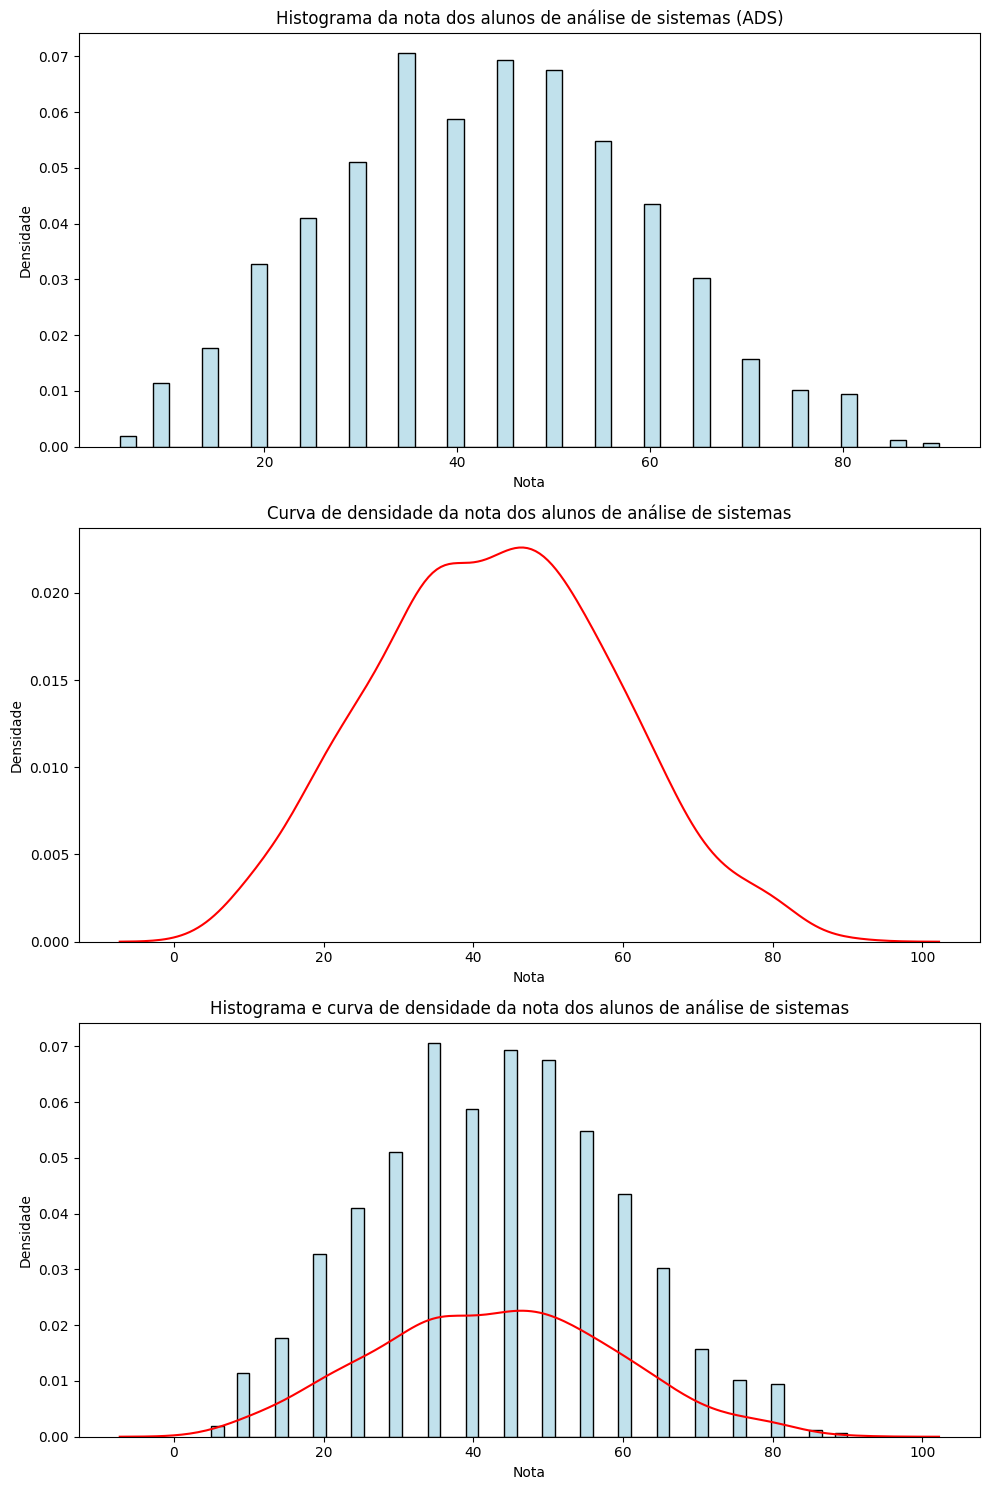

In [ ]:
# Gráficos da análise descritiva para nota dos alunos de ADS
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histograma
sns.histplot(microdados_ti_sem_NA['NT_OBJ_CE'], bins=50, stat='density', color='lightblue', ax=axs[0], edgecolor='black')
axs[0].set_title('Histograma da nota dos alunos de análise de sistemas (ADS)')
axs[0].set_xlabel('Nota')
axs[0].set_ylabel('Densidade')

# Curva de densidade
sns.kdeplot(microdados_ti_sem_NA['NT_OBJ_CE'], color='red', ax=axs[1])
axs[1].set_title('Curva de densidade da nota dos alunos de análise de sistemas')
axs[1].set_xlabel('Nota')
axs[1].set_ylabel('Densidade')

# Histograma e curva de densidade juntos
sns.histplot(microdados_ti_sem_NA['NT_OBJ_CE'], bins=50, stat='density', color='lightblue', ax=axs[2], edgecolor='black')
sns.kdeplot(microdados_ti_sem_NA['NT_OBJ_CE'], color='red', ax=axs[2])
axs[2].set_title('Histograma e curva de densidade da nota dos alunos de análise de sistemas')
axs[2].set_xlabel('Nota')
axs[2].set_ylabel('Densidade')

plt.tight_layout()
plt.show()


In [ ]:
# Comparando médias por sexo e estado civil
grouped_sexo_estado = microdados_ti_sem_NA.groupby(['sexo', 'estado_civil2']).agg(
    quantidade=('NT_GER', 'count'),
    media=('NT_GER', 'mean'),
    mediana=('NT_GER', 'median'),
    cv=('NT_GER', lambda x: x.std() / x.mean() * 100),
    amplitude_interquartil=('NT_GER', lambda x: x.quantile(0.75) - x.quantile(0.25))
).reset_index().sort_values(by='mediana', ascending=False)
print(grouped_sexo_estado)

        sexo estado_civil2  quantidade      media mediana         cv  \
2   Feminino   Separado(a)           1       70.7    70.7        NaN   
1   Feminino         Outro           3  46.833333    49.1  12.872334   
6  Masculino   Separado(a)           8    39.8625   45.75  48.928160   
5  Masculino         Outro          18  42.877778   44.95  31.967006   
0   Feminino     Casado(a)           5      41.56    42.9  21.338039   
3   Feminino   Solteiro(a)         114  41.137719   41.75  26.947142   
7  Masculino   Solteiro(a)         666  40.777177    40.0  32.905316   
4  Masculino     Casado(a)         115  38.431304    38.4  34.151904   
8  Masculino      Viúvo(a)           2      35.85   35.85   2.169644   

   amplitude_interquartil  
2                   0.000  
1                   5.700  
6                  27.975  
5                  20.175  
0                  10.600  
3                  17.125  
7                  19.350  
4                  20.600  
8                   0.550  

# Tabulação cruzada de estado civil vs sexo

In [ ]:
tab_civil_sexo = pd.crosstab(microdados_ti_sem_NA['estado_civil2'], microdados_ti_sem_NA['sexo'])
print(tab_civil_sexo)

# Proporção da tabulação cruzada
prop_tab_civil_sexo = tab_civil_sexo.div(tab_civil_sexo.sum().sum())
print(prop_tab_civil_sexo)

sexo           Feminino  Masculino
estado_civil2                     
Casado(a)             5        115
Outro                 3         18
Separado(a)           1          8
Solteiro(a)         114        666
Viúvo(a)              0          2
sexo           Feminino  Masculino
estado_civil2                     
Casado(a)      0.005365   0.123391
Outro          0.003219   0.019313
Separado(a)    0.001073   0.008584
Solteiro(a)    0.122318   0.714592
Viúvo(a)       0.000000   0.002146


# Estatísticas por estado civil com assimetria e curtose


In [ ]:
microdados_ti_sem_NA['NT_GER'] = pd.to_numeric(microdados_ti_sem_NA['NT_GER'], errors='coerce')

grouped_casados = microdados_ti_sem_NA.groupby('estado_civil2').agg(
    quantidade=('NT_GER', 'count'),
    media=('NT_GER', 'mean'),
    mediana=('NT_GER', 'median'),
    cv=('NT_GER', lambda x: x.std() / x.mean() * 100),
    amplitude_interquartil=('NT_GER', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    assimetria=('NT_GER', skew),
    curtose=('NT_GER', kurtosis)
).reset_index().sort_values(by='cv', ascending=False)
print(grouped_casados)



  estado_civil2  quantidade      media  mediana         cv  \
2   Separado(a)           9  43.288889    52.60  48.374483   
0     Casado(a)         120  38.561667    38.45  33.618924   
3   Solteiro(a)         780  40.829872    40.15  32.077222   
1         Outro          21  43.442857    47.20  29.598522   
4      Viúvo(a)           2  35.850000    35.85   2.169644   

   amplitude_interquartil    assimetria   curtose  
2                   28.10 -4.413419e-01 -1.121742  
0                   20.50  1.901354e-01 -0.557697  
3                   19.30  1.607680e-01 -0.278908  
1                   16.80 -6.831068e-01  0.168420  
4                    0.55  1.943516e-14 -2.000000  


/tmp/ipython-input-2482672660.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Gráficos histograma e boxplot pela variável estado civil e sexo

/tmp/ipython-input-2048117786.py:14: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



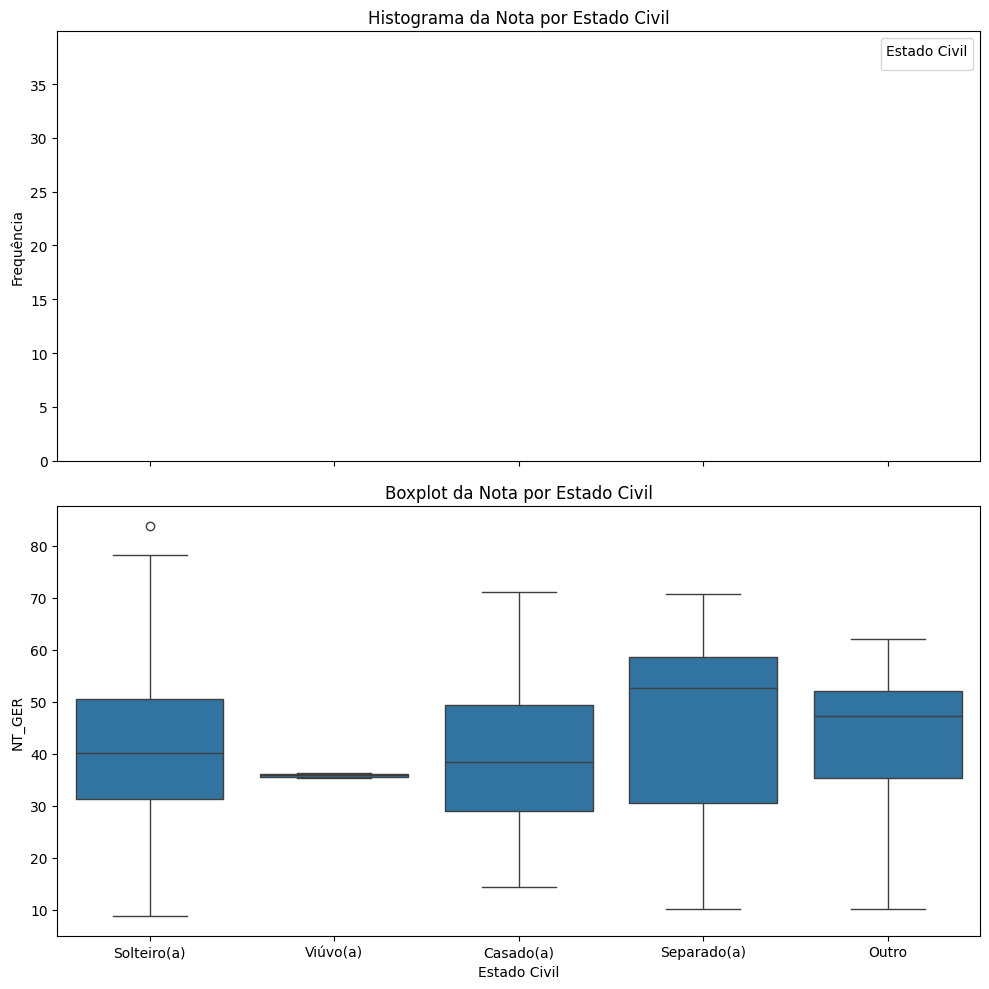

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Histogram
sns.histplot(
    data=microdados_ti_sem_NA, x='NT_GER', hue='estado_civil2',
    bins=50, element='step', kde=False, stat='count', ax=axes[0]
)
axes[0].set_title('Histograma da Nota por Estado Civil')
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequência')
axes[0].legend(title='Estado Civil')

# Boxplot
sns.boxplot(
    data=microdados_ti_sem_NA, x='estado_civil2', y='NT_GER', ax=axes[1]
)
axes[1].set_title('Boxplot da Nota por Estado Civil')
axes[1].set_xlabel('Estado Civil')
axes[1].set_ylabel('NT_GER')

plt.tight_layout()
plt.show()


/tmp/ipython-input-3204237536.py:10: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



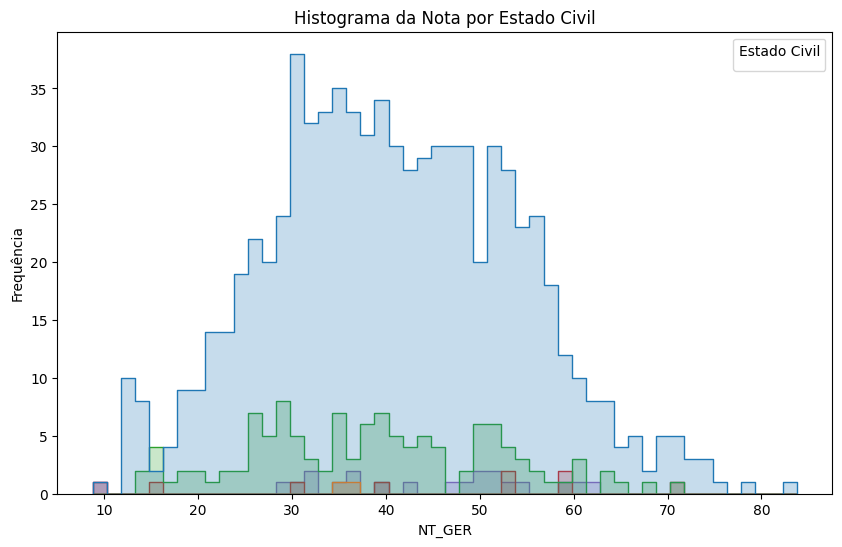

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=microdados_ti_sem_NA, x='NT_GER', hue='estado_civil2',
             bins=50, element='step', kde=False, stat='count')
plt.title('Histograma da Nota por Estado Civil')
plt.xlabel('NT_GER')
plt.ylabel('Frequência')
plt.legend(title='Estado Civil')
plt.show()



# Comparando as médias por sexo e região

In [ ]:

grouped_sexo_regiao = microdados_ti_sem_NA.groupby(['sexo', 'regiao']).agg(
    quantidade=('NT_GER', 'count'),
    media=('NT_GER', 'mean'),
    mediana=('NT_GER', 'median'),
    cv=('NT_GER', lambda x: x.std() / x.mean() * 100),
    amplitude_interquartil=('NT_GER', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    assimetria=('NT_GER', skew),
    curtose=('NT_GER', kurtosis)
).reset_index().sort_values(by='media', ascending=False)
print(grouped_sexo_regiao)

# Tabulação cruzada região x sexo


In [ ]:
tab_regiao_sexo = pd.crosstab(microdados_ti_sem_NA['regiao'], microdados_ti_sem_NA['sexo'])
print(tab_regiao_sexo)

# Proporção da tabulação cruzada
prop_tab_regiao_sexo = tab_regiao_sexo.div(tab_regiao_sexo.sum().sum())
print(prop_tab_regiao_sexo)

# Gráficos histograma e boxplot para região e sexo

In [ ]:
fig_hist2 = px.histogram(df_valid, x='NT_GER', color='regiao', title='Histograma da Nota por região e sexo',
                         nbins=50, barmode='overlay', facet_col='sexo')
fig_hist2.show()

fig_box2 = px.box(df_valid, x='regiao', y='NT_GER', color='regiao', title='Boxplot da Nota por região e sexo',
                  facet_col='sexo')
fig_box2.update_xaxes(tickangle=90)
fig_box2.show()

